In [18]:
import math 
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
import seaborn as sn 
plt.style.use('fivethirtyeight')

In [19]:
df = web.DataReader('ACES',data_source='yahoo',start='2012-01-01',end='2021-05-01')
df 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-29,25.270000,25.080000,25.260000,25.209999,298200.0,24.452044
2018-07-02,25.309999,25.200001,25.309999,25.209999,3200.0,24.452044
2018-07-03,25.350000,25.304001,25.350000,25.304001,6800.0,24.543222
2018-07-05,25.497999,25.200001,25.200001,25.497999,2300.0,24.731384
2018-07-06,25.690001,25.690001,25.690001,25.690001,100.0,24.917614
...,...,...,...,...,...,...
2021-04-26,77.237999,75.500000,76.750000,77.230003,53900.0,77.230003
2021-04-27,77.449997,76.489998,77.370003,76.790001,58000.0,76.790001
2021-04-28,76.087997,75.014000,76.000000,75.709999,54100.0,75.709999


In [20]:
df.shape

(714, 6)

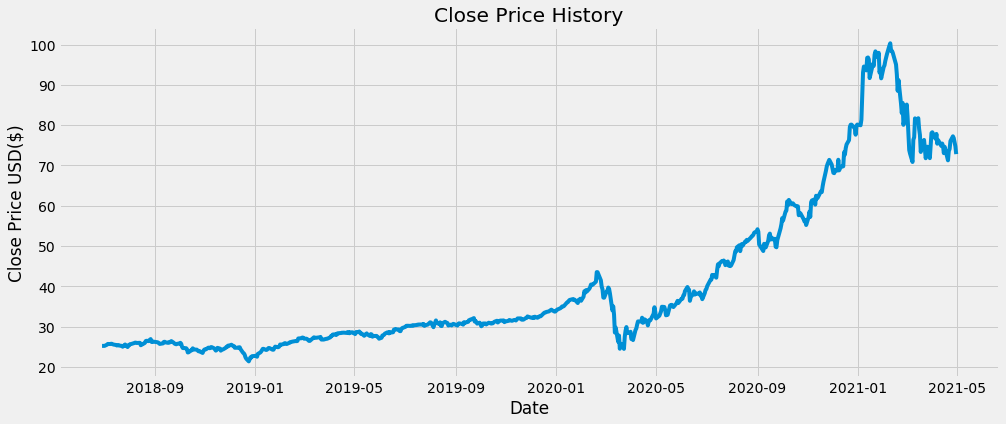

In [21]:
plt.figure(figsize=(15,6))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel("Close Price USD($)")
plt.show()

In [22]:
close_data = df.filter(['Close'])
dataset = close_data.values
training_data_len = math.ceil(len(dataset) * .8)

In [23]:
#Scale Data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04875885],
       [0.04875885],
       [0.04994935],
       [0.05240626],
       [0.05483789],
       [0.05458459],
       [0.05547111],
       [0.05520516],
       [0.05379938],
       [0.0529382 ],
       [0.05154508],
       [0.05002532],
       [0.05065856],
       [0.05141843],
       [0.04977204],
       [0.04875885],
       [0.04609928],
       [0.04926544],
       [0.04926544],
       [0.05312816],
       [0.04507346],
       [0.05087386],
       [0.05087386],
       [0.05422999],
       [0.0543313 ],
       [0.05667425],
       [0.0576241 ],
       [0.05889057],
       [0.05890323],
       [0.0578774 ],
       [0.05838398],
       [0.05838398],
       [0.05078521],
       [0.05445794],
       [0.05369807],
       [0.05823201],
       [0.06382978],
       [0.06496959],
       [0.06420972],
       [0.06363981],
       [0.0701621 ],
       [0.06129686],
       [0.0629306 ],
       [0.06142349],
       [0.06180343],
       [0.06028369],
       [0.05939715],
       [0.057

In [24]:
#Create Scaled Training set
train_data_scaled = scaled_data[0:training_data_len , :]

#create x_train, y_train
x_train,y_train = [],[]

for i in range(60, len(train_data_scaled)):
    x_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])


In [25]:
#Convert to array
x_train,y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(512, 60, 1)

In [26]:
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(60, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
512/512 [==============================] - 9s 14ms/step - loss: 0.0019
Epoch 2/20
512/512 [==============================] - 8s 16ms/step - loss: 3.9945e-04
Epoch 3/20
512/512 [==============================] - 10s 19ms/step - loss: 3.9656e-04
Epoch 4/20
512/512 [==============================] - 10s 19ms/step - loss: 2.8583e-04
Epoch 5/20
512/512 [==============================] - 13s 26ms/step - loss: 2.7952e-04
Epoch 6/20
512/512 [==============================] - 13s 26ms/step - loss: 2.6200e-04
Epoch 7/20
512/512 [==============================] - 15s 30ms/step - loss: 1.7674e-04
Epoch 8/20
512/512 [==============================] - 13s 26ms/step - loss: 1.5810e-04
Epoch 9/20
512/512 [==============================] - 17s 33ms/step - loss: 1.2255e-04
Epoch 10/20
512/512 [==============================] - 15s 29ms/step - loss: 2.2187e-04
Epoch 11/20
512/512 [==============================] - 15s 30ms/step - loss: 1.7581e-04
Epoch 12/20
512/512 [==========================

In [28]:
#Create Scaled Train Set
test_data_scaled = scaled_data[training_data_len-60: , :]

#Create x_test dan y_test
x_test, y_test = [], dataset[training_data_len:, :]

for i in range(60,len(test_data_scaled)):
    x_test.append(test_data_scaled[i-60:i, 0])

In [29]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_test.shape

(142, 60, 1)

In [30]:
# Get Predicted Value 
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)

In [31]:
#Get the root mean squared error (RMSE
rmse = np.sqrt(np.mean(predict - y_test)**2)
rmse

1.7629616697069626

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(*args, **kw)>

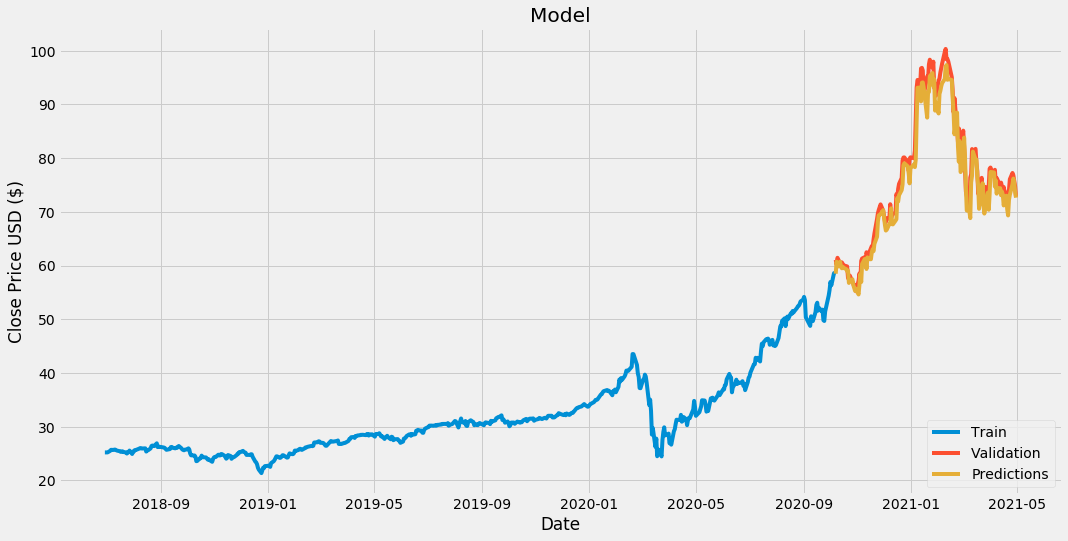

In [32]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predict

#Plot
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train["Close"])
plt.plot(valid[["Close",'Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show 


In [33]:
quotes = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2021-05-22')
df_new = quotes.filter(['Close'])
last_60 = df_new[-60:].values
last_60_scaled = scaler.transform(last_60)
x_test = []
x_test.append(last_60_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0],x_test.shape[1],1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[118.688515]]


In [34]:
actual_price = web.DataReader('AAPL',data_source='yahoo', start='2021-05-22',end='2021-05-22')
print(actual_price['Close'])

Date
2021-05-21    125.43
Name: Close, dtype: float64
